# Moments
Image moments help you to calculate some features like center of mass of the object, area of the object etc.

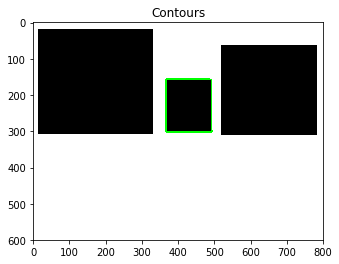

{'m00': 18265.0, 'm10': 7836442.333333333, 'm01': 4192400.1666666665, 'm20': 3386311255.5, 'm11': 1798769899.75, 'm02': 994275465.0, 'm30': 1473592851290.1, 'm21': 777316190176.05, 'm12': 426613694409.11664, 'm03': 242901528373.15002, 'mu20': 24152567.098205566, 'mu11': 56396.090520858765, 'mu02': 31985886.162513375, 'mu30': 8422.459716796875, 'mu21': 1338746.2229385376, 'mu12': 2404243.2648506165, 'mu03': 28557.32843017578, 'nu20': 0.07239756244942902, 'nu11': 0.00016904784774165348, 'nu02': 0.09587801501741554, 'nu30': 1.8680553973685589e-07, 'nu21': 2.9692657389380785e-05, 'nu12': 5.3324797725470865e-05, 'nu03': 6.333858908464403e-07}


In [15]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


img = cv2.imread('../Data/Images/shapes.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

edged = cv2.Canny(gray,30,200)

cv2.imshow('Canny', edged)
cv2.waitKey()


_, contours,hierarchy = cv2.findContours(edged, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)

cnt = contours[0]

cv2.drawContours(img, cnt, -1, (0, 255, 0), 3)

cv2.imshow('Contour', img)
cv2.waitKey()

plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title('Contours')
plt.show()

M = cv2.moments(cnt)

print(M)

cv2.destroyAllWindows()

# Centroid

429 229


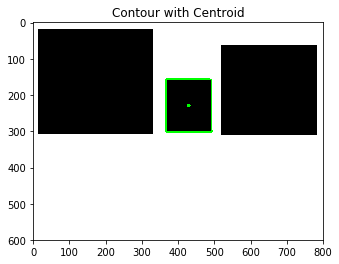

In [16]:
cx = int(M['m10']/M['m00'])
cy = int(M['m01']/M['m00'])
print(cx, cy)

cv2.circle(img, (cx, cy), 5, (0,255,0), -1)
cv2.imshow('Contour with Centroid', img)
cv2.waitKey()

plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title('Contour with Centroid')
plt.show()

cv2.destroyAllWindows()

# Area


In [17]:
area = cv2.contourArea(cnt)
print(area)
print(M['m00'])

18265.0
18265.0


# Contour Perimeter  (Arc Length)

In [18]:
perimeter = cv2.arcLength(cnt,True)
print(perimeter)

544.6274166107178


# Bounding Rectangle

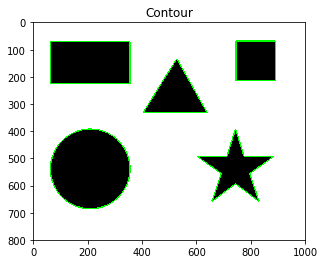

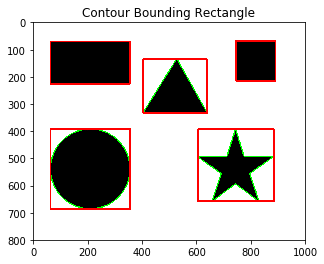

In [20]:
image = cv2.imread('../Data/Images/someshapes.jpg')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
edged = cv2.Canny(gray,30,200)

_, contours,hierarchy = cv2.findContours(edged, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

for (i, c) in enumerate(contours):
    cv2.drawContours(image, [c], -1, (0, 255, 0), 3)
    cv2.imshow('Contour', image)
    cv2.waitKey()
    
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Contour')
plt.show()
    
for (i, cnt) in enumerate(contours):
    x,y,w,h = cv2.boundingRect(cnt)
    cv2.rectangle(image,(x,y),(x+w,y+h),(0,0,255),5)
    cv2.imshow('Contour Bounding rectangle', image)
    cv2.waitKey()
    
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Contour Bounding Rectangle')
plt.show()

cv2.destroyAllWindows()